In [1]:
%matplotlib notebook

# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cycle_share = pd.read_csv("../Resources/trip.csv", low_memory=False)

In [4]:
cycle_share.columns

Index(['stoptime', 'bikeid', 'tripduration', 'from_station_name',
       'to_station_name', 'from_station_id', 'to_station_id', 'usertype',
       'gender', 'birthyear'],
      dtype='object')

In [5]:
gender_group = cycle_share.loc[cycle_share["gender"] != "stoptime",:].groupby("gender").count()["usertype"]

<IPython.core.display.Javascript object>


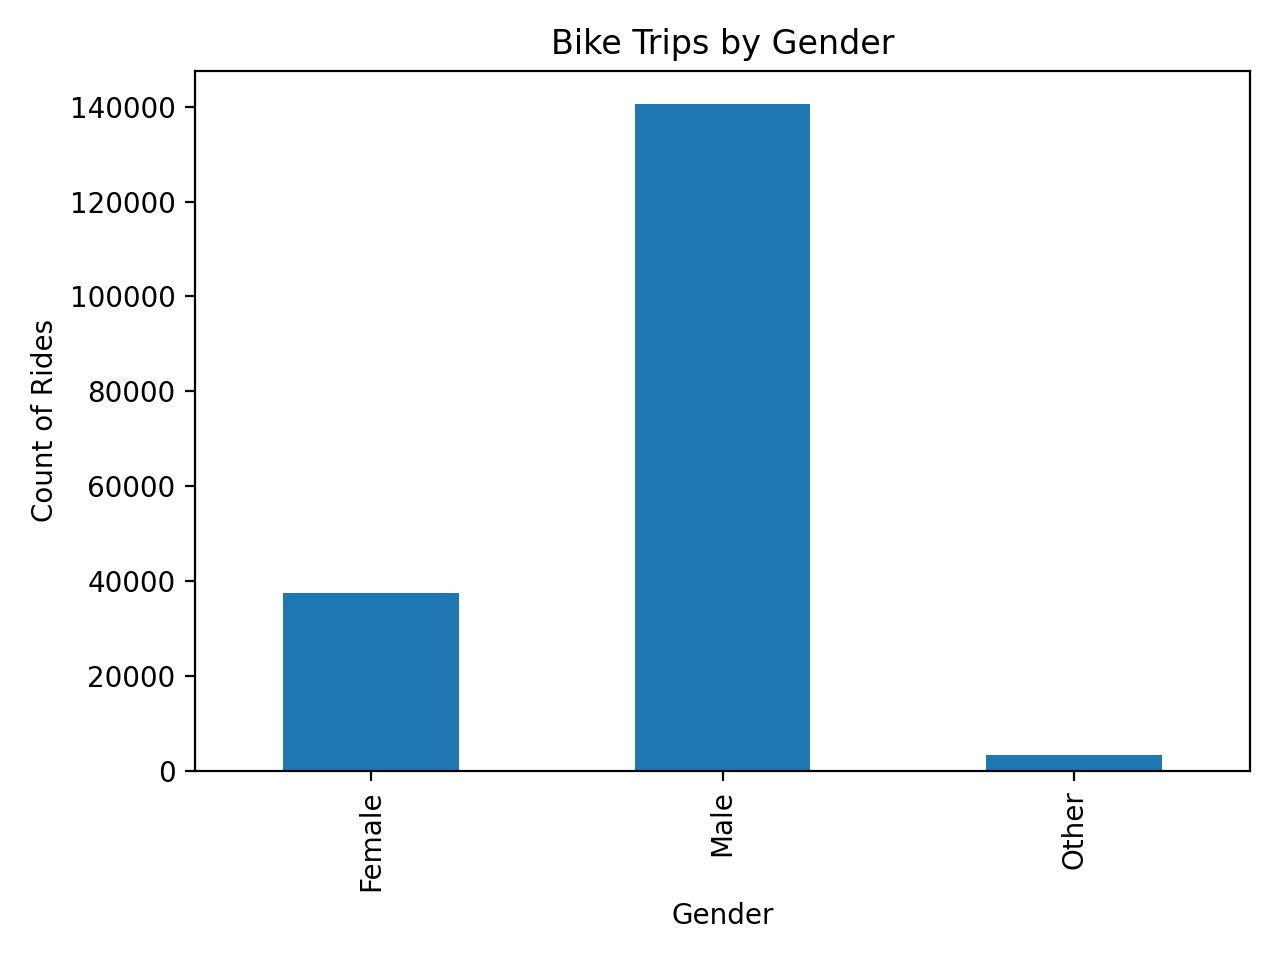

In [13]:
gender_plot = gender_group.plot(kind="bar", title="Bike Trips by Gender", xlabel="Gender", ylabel="Count of Rides")
plt.show()
plt.tight_layout()

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each bike. For this part of the activity, we want you to chart the total 'Trip Duration' of each bike, sorted by gender. Bonus points if you can come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

In [25]:
bike_group = cycle_share.loc[cycle_share["gender"] != "stoptime",:].groupby(["bikeid","gender"]).sum()
bike_group

tripduration
bikeid   gender              
SEA00001 Female     15876.665
         Male       41150.373
         Other        276.880
SEA00005 Female     20616.240
         Male       60386.328
...                       ...
SEA00499 Male      160881.803
         Other       4712.502
SEA00500 Female     53074.638
         Male      207846.090
         Other       4123.578

[1457 rows x 1 columns]

<IPython.core.display.Javascript object>


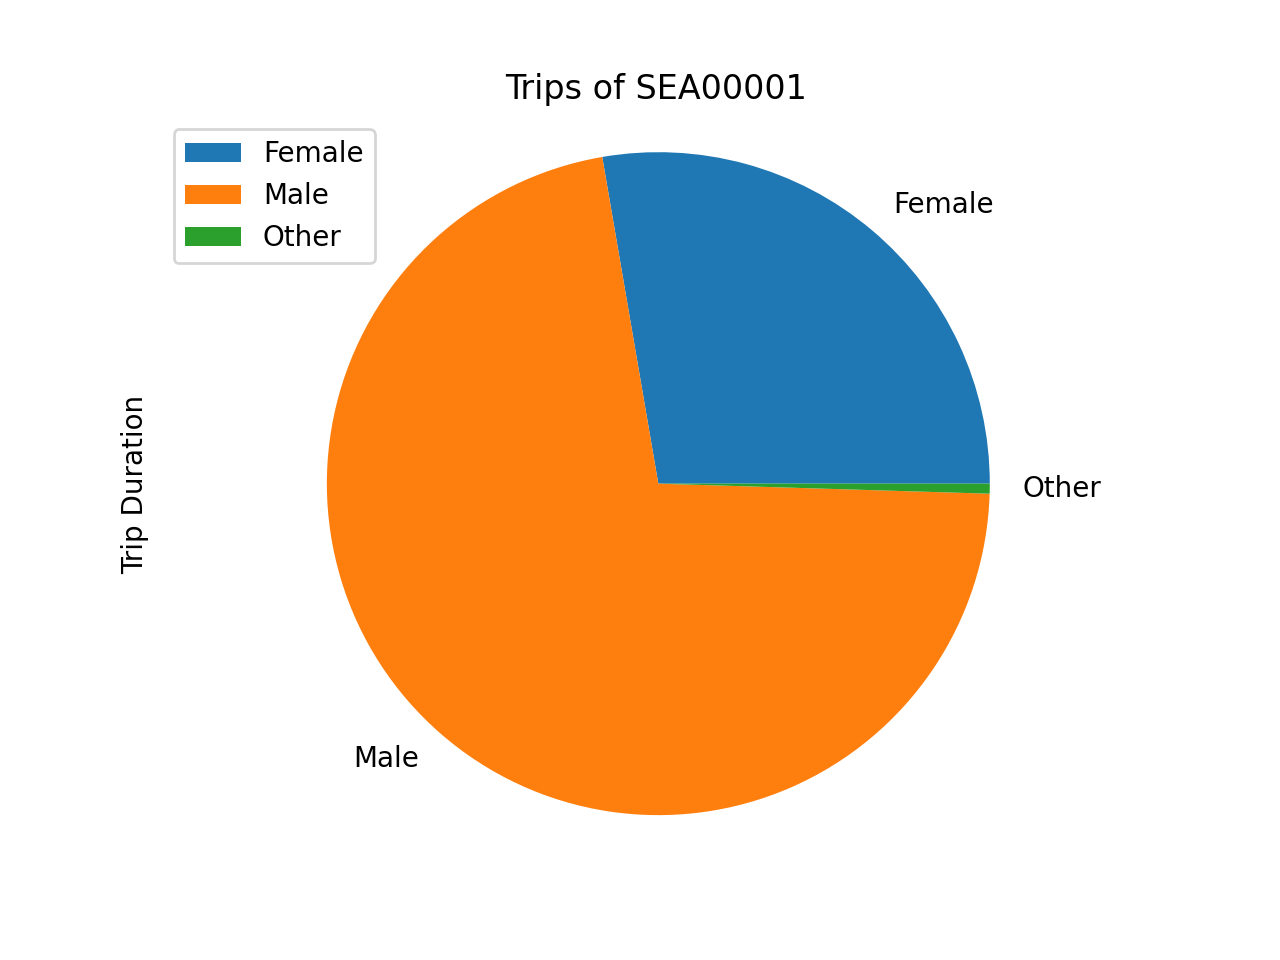

(-1.1147094275724618,
 1.1007004506069709,
 -1.1184745250918073,
 1.1115901234827354)

In [26]:
bike_id = "SEA00001"

just_one_bike = bike_group.loc[bike_id]

bike_pie = just_one_bike.plot(kind="pie", y='tripduration', title=("Trips of " + bike_id))
bike_pie.set_ylabel("Trip Duration")

plt.show()
plt.axis("equal")